In [26]:
include("MC.jl")

In [46]:
include("viz.jl");

In [2]:
ENV["COLUMNS"] = 200
const N = 30;

In [45]:
city = "Athens";

In [3]:
fn_athens = "irradiation_Athens.nc"
fn_athens_w  = "irradiation_Athens_W.nc"
fn_athens2020 = "irradiation2020_Athens.nc"
fn_athens2020_w  = "irradiation2020_Athens_W.nc";

In [5]:
test = getCMF0(fn_athens; raw=1)[2]
test_neib_w = getCMF0(fn_athens_w; raw=1)[2]

test2020 = getCMF1(fn_athens2020)
test2020_neib_w = getCMF1(fn_athens2020_w);

In [6]:
df01 = getDFtm(fn_athens)
df02 = getDFtm(fn_athens2020);

In [7]:
df1_train = df01[1:523007, :]
df1_test = df01[523008:end, :]
df2_train = calCMF(df1_train)
data_train = df2_train.real

data_train_cls, binStarts, binMean = getBins(data_train, N) 
ticks = rd.(binMean, 2)

30-element Vector{Float64}:
 0.19
 0.26
 0.32
 0.37
 0.43
 0.5
 0.59
 0.66
 0.71
 0.76
 0.81
 0.85
 0.9
 ⋮
 0.95
 0.95
 0.95
 0.95
 0.96
 0.96
 0.96
 0.96
 0.97
 0.97
 0.99
 1.0

In [8]:
xti = (binMean[[1:2:15; 25; 30]], ticks[[1:2:15; 25; 30]]);

### comp DFs

In [9]:
df21 = getDF(2, 1) 

,time,month,ghi,ghiCS,real,pers,neib,pred,real_cls,dif_pers,dif_neib,dif_pred
,DateTime,Int8,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,2019-01-01T06:15:00,1,3.22831,8.29262,0.389299,0.929003,0.493136,0.49599,4,0.539704,0.103838,0.106692
2,2019-01-01T06:30:00,1,12.2594,16.9041,0.725234,0.389299,0.657577,0.735315,9,-0.335936,-0.0676571,0.010081
3,2019-01-01T06:45:00,1,22.3234,26.5306,0.841421,0.725234,0.475048,0.842306,12,-0.116186,-0.366372,0.000885952
4,2019-01-01T07:00:00,1,28.2418,36.5499,0.77269,0.841421,0.306035,0.737132,10,0.0687302,-0.466656,-0.0355583
5,2019-01-01T07:15:00,1,14.1422,46.5776,0.303627,0.77269,0.150091,0.334387,3,0.469064,-0.153536,0.0307599
6,2019-01-01T07:30:00,1,10.7818,56.377,0.191245,0.303627,0.119848,0.267708,1,0.112382,-0.0713974,0.0764629
7,2019-01-01T07:45:00,1,20.1599,65.7885,0.306435,0.191245,0.116912,0.361413,3,-0.11519,-0.189523,0.0549781
8,2019-01-01T08:00:00,1,21.519,74.6941,0.288095,0.306435,0.120289,0.316244,2,0.01834,-0.167806,0.0281492
9,2019-01-01T08:15:00,1,21.2941,83.0021,0.256549,0.288095,0.118009,0.310751,2,0.031546,-0.13854,0.0542022


In [10]:
df22 = getDF(2, 2)
df23 = getDF(2, 3)
df24 = getDF(2, 4);

In [11]:
df21_2020 = getDF(2, 1; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)

,time,month,ghi,ghiCS,real,pers,neib,pred,real_cls,dif_pers,dif_neib,dif_pred
,DateTime,Int8,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,2020-01-01T06:15:00,1,6.20729,10.0989,0.614652,0.502499,0.525063,0.611719,7,-0.112153,-0.0895893,-0.00293285
2,2020-01-01T06:30:00,1,13.3307,19.7287,0.675703,0.614652,0.791924,0.676321,8,-0.0610511,0.11622,0.000617703
3,2020-01-01T06:45:00,1,16.9255,30.0285,0.563646,0.675703,0.748868,0.590716,7,0.112057,0.185222,0.0270698
4,2020-01-01T07:00:00,1,23.4972,40.4386,0.581057,0.563646,0.667907,0.599816,7,-0.0174108,0.0868501,0.0187591
5,2020-01-01T07:15:00,1,28.8591,50.6642,0.569616,0.581057,0.611277,0.599816,7,0.0114412,0.0416612,0.0302004
6,2020-01-01T07:30:00,1,36.6478,60.5389,0.605359,0.569616,0.595809,0.599816,7,-0.035743,-0.00955019,-0.00554262
7,2020-01-01T07:45:00,1,46.2966,69.9453,0.661898,0.605359,0.623387,0.676321,8,-0.056539,-0.0385112,0.0144231
8,2020-01-01T08:00:00,1,54.5623,78.7777,0.692611,0.661898,0.666933,0.729917,9,-0.0307131,-0.0256778,0.0373056
9,2020-01-01T08:15:00,1,49.9429,86.9628,0.574302,0.692611,0.577002,0.587904,7,0.118309,0.00270003,0.0136016


In [12]:
df22_2020 = getDF(2, 2; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df23_2020 = getDF(2, 3; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df24_2020 = getDF(2, 4; df_test=df02, d_test=test2020, d_neib=test2020_neib_w);

In [ ]:
dfA = copy(df21)    
gb = groupby(dfA, :real_cls)
#     if err == "mae"
    mae_pers = [meanad(g.pers, g.real) for g in gb]
    mae_pred = [meanad(g.pred, g.real) for g in gb]
    mae_neib = [meanad(g.neib, g.real) for g in gb]
    df1 = DataFrame(:mae_pers=>mae_pers, :mae_neib=>mae_neib, :mae_pred=>mae_pred)     

    mae_min = Int64[]

    for i in 1:size(df1, 1) 
        row = Array(eachrow(df1)[i])
        id = findfirst(row .== minimum(row))
        push!(mae_min, id)
    end

mae_min[end]

if length(mae_min) < 30
    push!(mae_min, mae_min[end])
end

dfB = copy(df21_2020)

describe(dfB.real_cls)

mae_min

dfB.mae_min = Int64[0; mae_min[dfB.real_cls[1:end-1]]]

    dfB.hyb_m = map(eachrow(dfB)) do r
        if r.mae_min ≤ 1
            r.pers
        elseif r.mae_min == 2
            r.neib
        elseif r.mae_min == 3
            r.pred
        else 
            r.pred_n
        end
    end



In [27]:
df1t = hybrid(df21, df21_2020, 1) 

,time,month,ghi,ghiCS,real,pers,neib,pred,real_cls,dif_pers,dif_neib,dif_pred,mae_min,hyb_m,rmse_min,hyb_r,dif_hyb_m,dif_hyb_r
,DateTime,Int8,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Float64,Int64,Float64,Float64,Float64
1,2020-01-01T06:15:00,1,6.20729,10.0989,0.614652,0.502499,0.525063,0.611719,7,-0.112153,-0.0895893,-0.00293285,0,0.502499,0,0.502499,-0.112153,-0.112153
2,2020-01-01T06:30:00,1,13.3307,19.7287,0.675703,0.614652,0.791924,0.676321,8,-0.0610511,0.11622,0.000617703,3,0.676321,3,0.676321,0.000617703,0.000617703
3,2020-01-01T06:45:00,1,16.9255,30.0285,0.563646,0.675703,0.748868,0.590716,7,0.112057,0.185222,0.0270698,3,0.590716,3,0.590716,0.0270698,0.0270698
4,2020-01-01T07:00:00,1,23.4972,40.4386,0.581057,0.563646,0.667907,0.599816,7,-0.0174108,0.0868501,0.0187591,3,0.599816,3,0.599816,0.0187591,0.0187591
5,2020-01-01T07:15:00,1,28.8591,50.6642,0.569616,0.581057,0.611277,0.599816,7,0.0114412,0.0416612,0.0302004,3,0.599816,3,0.599816,0.0302004,0.0302004
6,2020-01-01T07:30:00,1,36.6478,60.5389,0.605359,0.569616,0.595809,0.599816,7,-0.035743,-0.00955019,-0.00554262,3,0.599816,3,0.599816,-0.00554262,-0.00554262
7,2020-01-01T07:45:00,1,46.2966,69.9453,0.661898,0.605359,0.623387,0.676321,8,-0.056539,-0.0385112,0.0144231,3,0.676321,3,0.676321,0.0144231,0.0144231
8,2020-01-01T08:00:00,1,54.5623,78.7777,0.692611,0.661898,0.666933,0.729917,9,-0.0307131,-0.0256778,0.0373056,3,0.729917,3,0.729917,0.0373056,0.0373056
9,2020-01-01T08:15:00,1,49.9429,86.9628,0.574302,0.692611,0.577002,0.587904,7,0.118309,0.00270003,0.0136016,3,0.587904,3,0.587904,0.0136016,0.0136016


In [28]:
df2t = hybrid(df22, df22_2020, 2)

,time,month,ghi,ghiCS,real,pers,neib,pred,pred_n,dif_pred_n,real_cls,dif_pers,dif_neib,dif_pred,mae_min,hyb_m,rmse_min,hyb_r,dif_hyb_m
,DateTime,Int8,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Int64,Float64,Int64,Float64,Float64
1,2020-01-01T06:30:00,1,13.3307,19.7287,0.675703,0.502499,0.525063,0.611719,0.599816,-0.075887,8,-0.173204,-0.15064,-0.0639839,0,0.502499,0,0.502499,-0.173204
2,2020-01-01T06:45:00,1,16.9255,30.0285,0.563646,0.614652,0.791924,0.676321,0.66383,0.100184,7,0.0510058,0.228277,0.112675,4,0.66383,4,0.66383,0.100184
3,2020-01-01T07:00:00,1,23.4972,40.4386,0.581057,0.675703,0.748868,0.590716,0.599816,0.0187591,7,0.0946461,0.167811,0.00965896,4,0.599816,4,0.599816,0.0187591
4,2020-01-01T07:15:00,1,28.8591,50.6642,0.569616,0.563646,0.667907,0.599816,0.599816,0.0302004,7,-0.00596956,0.0982913,0.0302004,4,0.599816,4,0.599816,0.0302004
5,2020-01-01T07:30:00,1,36.6478,60.5389,0.605359,0.581057,0.611277,0.599816,0.599816,-0.00554262,7,-0.0243017,0.00591825,-0.00554262,4,0.599816,4,0.599816,-0.00554262
6,2020-01-01T07:45:00,1,46.2966,69.9453,0.661898,0.569616,0.595809,0.599816,0.599816,-0.0620816,8,-0.092282,-0.0660892,-0.0620816,4,0.599816,4,0.599816,-0.0620816
7,2020-01-01T08:00:00,1,54.5623,78.7777,0.692611,0.605359,0.623387,0.676321,0.66383,-0.0287808,9,-0.0872521,-0.0692243,-0.01629,4,0.66383,4,0.66383,-0.0287808
8,2020-01-01T08:15:00,1,49.9429,86.9628,0.574302,0.661898,0.666933,0.729917,0.717158,0.142856,7,0.087596,0.0926314,0.155615,4,0.717158,4,0.717158,0.142856
9,2020-01-01T08:30:00,1,40.0488,94.4736,0.423915,0.692611,0.577002,0.587904,0.599816,0.175901,5,0.268696,0.153087,0.163989,4,0.599816,4,0.599816,0.175901


In [29]:
df3t = hybrid(df23, df23_2020, 3)
df4t = hybrid(df24, df24_2020, 4);

### old

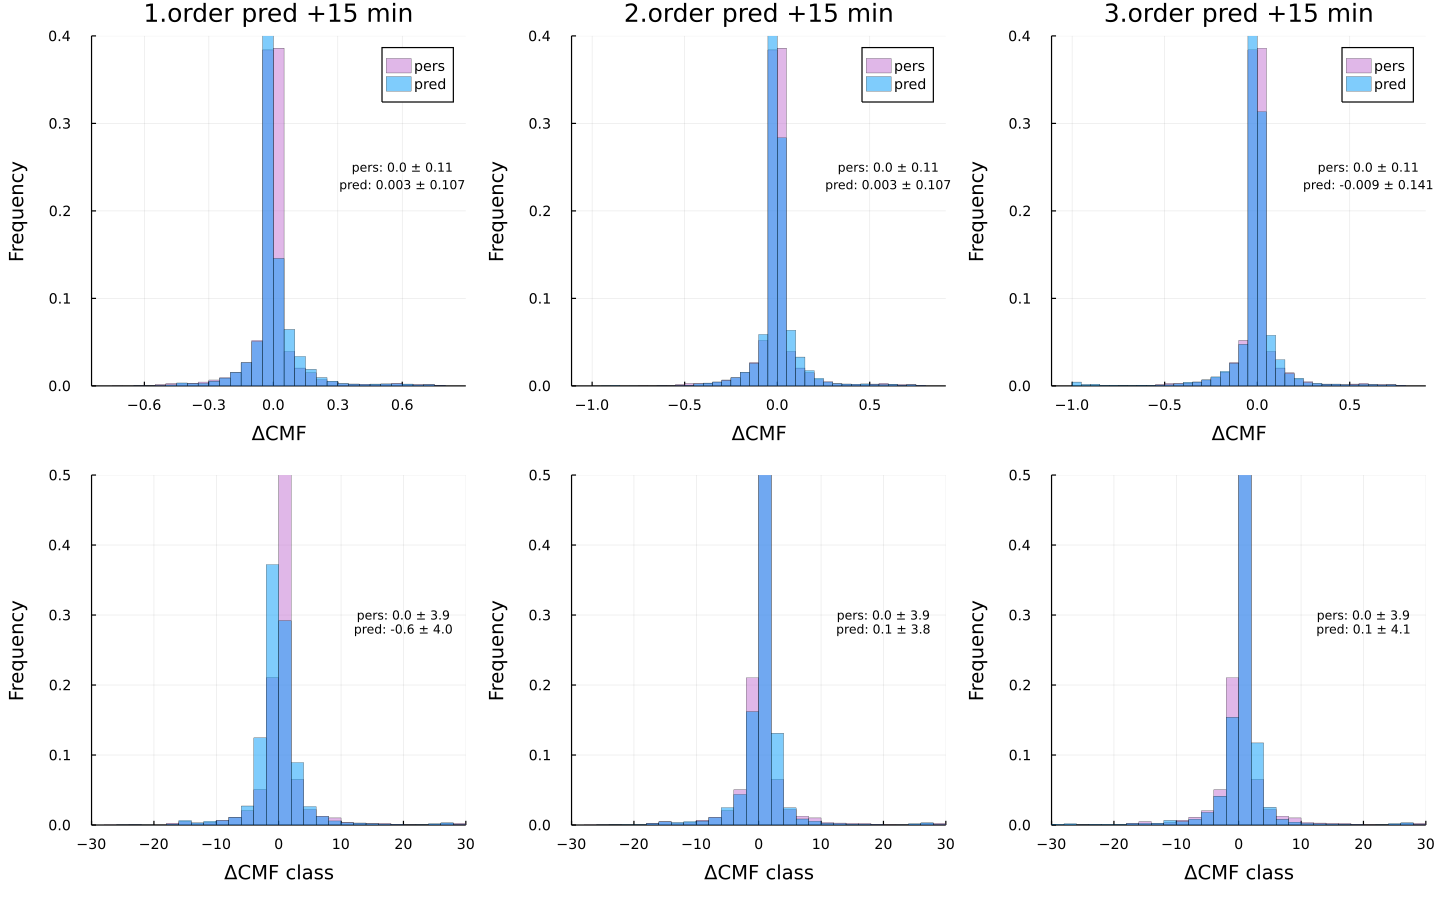

In [27]:
h_dif = plot(h1, h2, h3, h11, h12, h13, layout=@layout([a b c; d e f]), dpi=:120, size=(1200, 750), 
        left_margin=20px, bottom_margin=20px, fmt=:png)

In [5]:
od, n = 2, 30
mae1, rmse1 = mae_rmse(getDF(od, 1, n); tit="Athens $(od).order +$(15*1) min")
mae2, rmse2 = mae_rmse(getDF(od, 2, n); tit="+$(15*2) min")
mae3, rmse3 = mae_rmse(getDF(od, 3, n); tit="+$(15*3) min")
mae4, rmse4 = mae_rmse(getDF(od, 4, n); tit="+$(15*4) min");

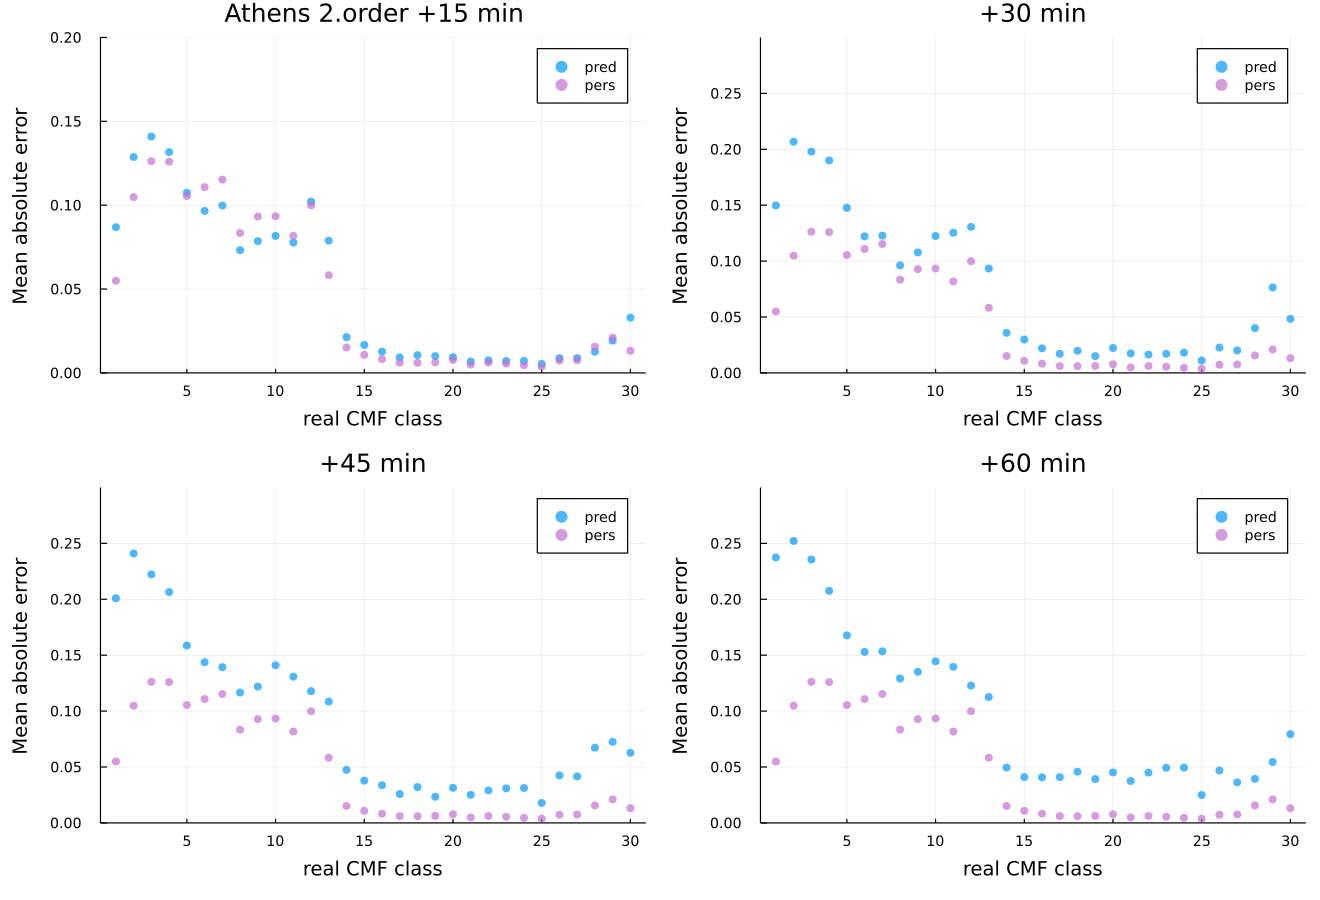

In [6]:
maes = plot(mae1, mae2, mae3, mae4, layout=@layout([a b; c d]), dpi=:120, size=(1100, 750), 
        left_margin=20px, bottom_margin=20px, fmt=:png)

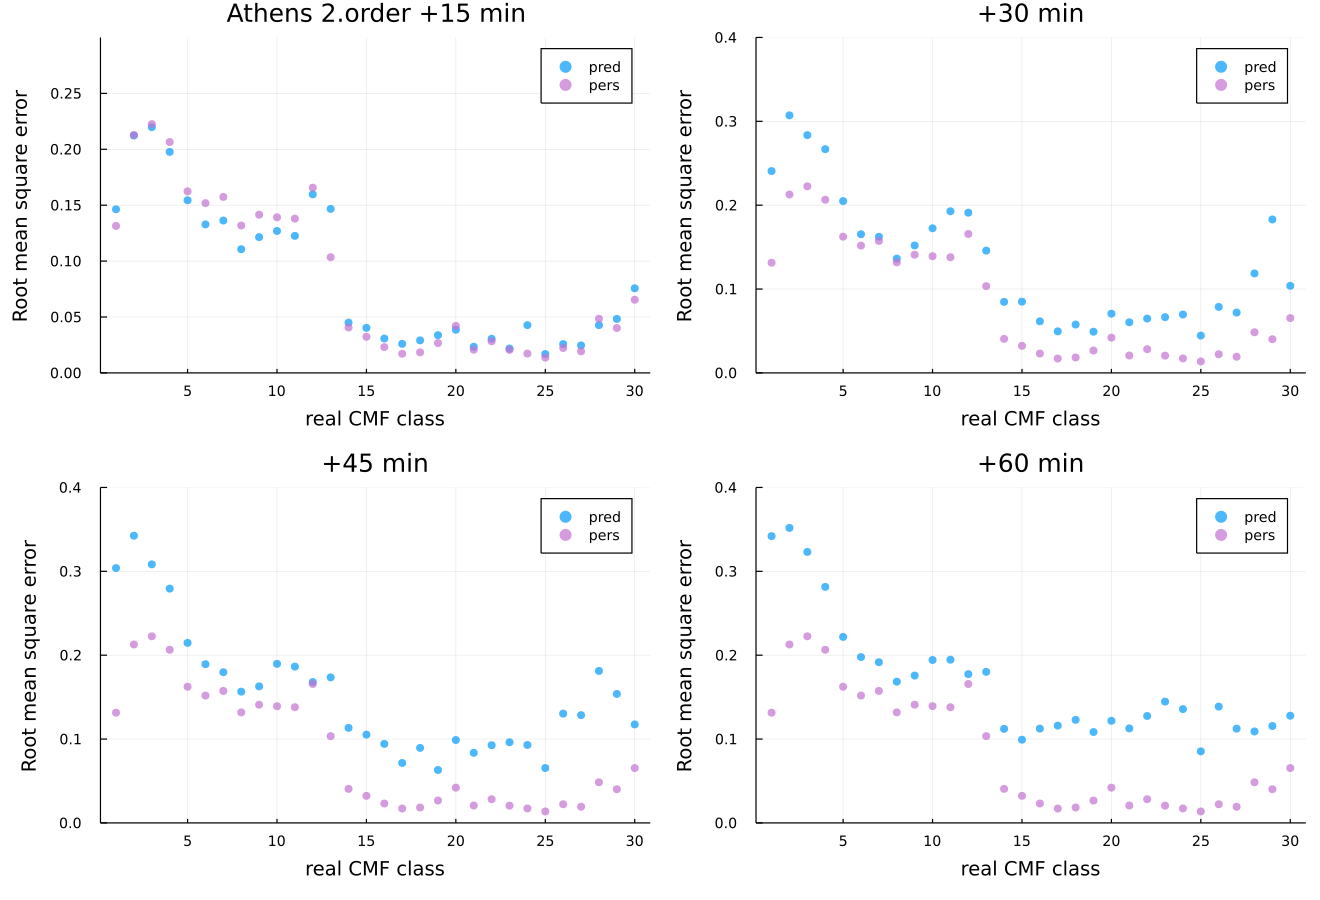

In [7]:
rmses = plot(rmse1, rmse2, rmse3, rmse4, layout=@layout([a b; c d]), dpi=:120, size=(1100, 750), 
        left_margin=20px, bottom_margin=20px, fmt=:png)

In [19]:
ticks = rd.(binMean, 2)[[1:2:15;29]]

9-element Vector{Float64}:
 0.19
 0.32
 0.43
 0.59
 0.71
 0.81
 0.9
 0.93
 0.99

In [20]:
h_train = histogram(data_train, bins=binStarts, xticks=ticks, ylabel="Counts",
    title="Athens train (2004_02-2018_12)")

h_test = histogram(data_test, bins=binStarts, xticks=ticks, 
    title="test (2019)");

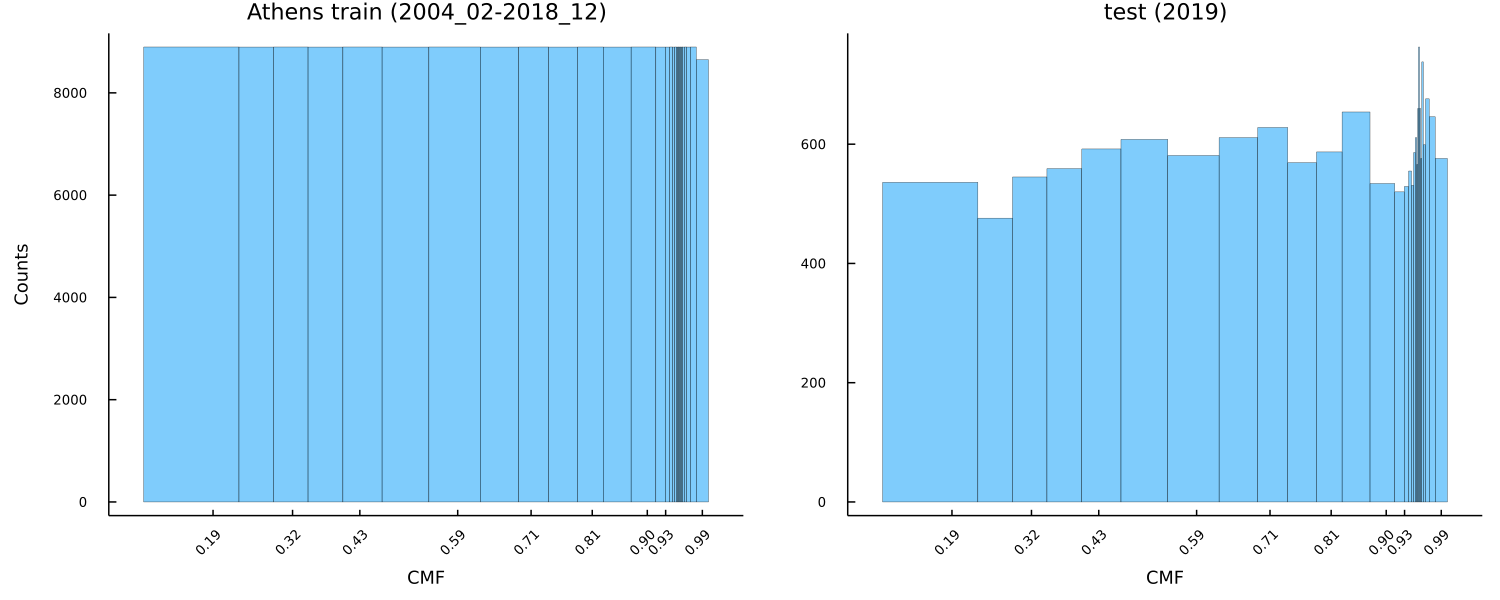

In [21]:
l = @layout [a b]
h_ep = plot(h_train, h_test, layout=l, leg=false, grid=false, xlabel="CMF", 
    lw=0.2, fillalpha=0.5, labelfontsize=8, titlefontsize=10, tickfontsize=6, xrotation=45,
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

In [13]:
describe(df11.pred_cls)

Summary Stats:
Length:         17937
Missing Count:  0
Mean:           14.893126
Minimum:        2.000000
1st Quartile:   8.000000
Median:         14.000000
3rd Quartile:   21.000000
Maximum:        29.000000
Type:           Int64


In [23]:
df11 = getDF(1, 1, N)

df12 = getDF(1, 2, N)

df13 = getDF(1, 3, N)
df14 = getDF(1, 4, N);

In [24]:
df21 = getDF(2, 1, N)

df22 = getDF(2, 2, N)
df23 = getDF(2, 3, N)
df24 = getDF(2, 4, N);

,real,real_cls,pers,pers_cls,dif_pers,dif_cls_pers,pred,pred_cls,dif_pred,dif_cls_pred,pred_n,pred_cls_n,dif_pred_n,dif_cls_pred_n
,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64,Float64,Int64
1,0.303627,3,0.389299,4,0.0856718,1,0.49599,6,0.192364,3,0.599816,7,0.29619,4
2,0.191245,1,0.725234,9,0.533989,8,0.735315,9,0.54407,8,0.717158,9,0.525913,8
3,0.306435,3,0.841421,12,0.534986,9,0.842306,12,0.535871,9,0.833206,12,0.526771,9
4,0.288095,2,0.77269,10,0.484595,8,0.737132,9,0.449037,7,0.717158,9,0.429063,7
5,0.256549,2,0.303627,3,0.0470778,1,0.334387,3,0.0778377,1,0.564615,7,0.308066,5
6,0.229625,1,0.191245,1,-0.0383795,0,0.267708,2,0.0380835,1,0.522433,6,0.292808,5
7,0.22068,1,0.306435,3,0.0857549,2,0.361413,4,0.140733,3,0.611719,7,0.391039,6
8,0.18659,1,0.288095,2,0.101505,1,0.316244,3,0.129654,2,0.553984,7,0.367394,6
9,0.217646,1,0.256549,2,0.038903,1,0.310751,3,0.0931052,2,0.553984,7,0.336338,6


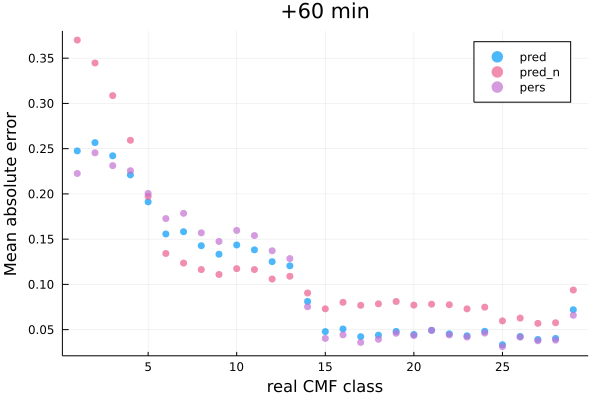

In [25]:
mae11 = mae_rmse(df11, tit="Athens 1.order +15 min")[1]

mae12 = viz_err(df12, "+30 min")

mae13 = viz_err(df13, "+45 min")
mae14 = viz_err(df14, "+60 min")

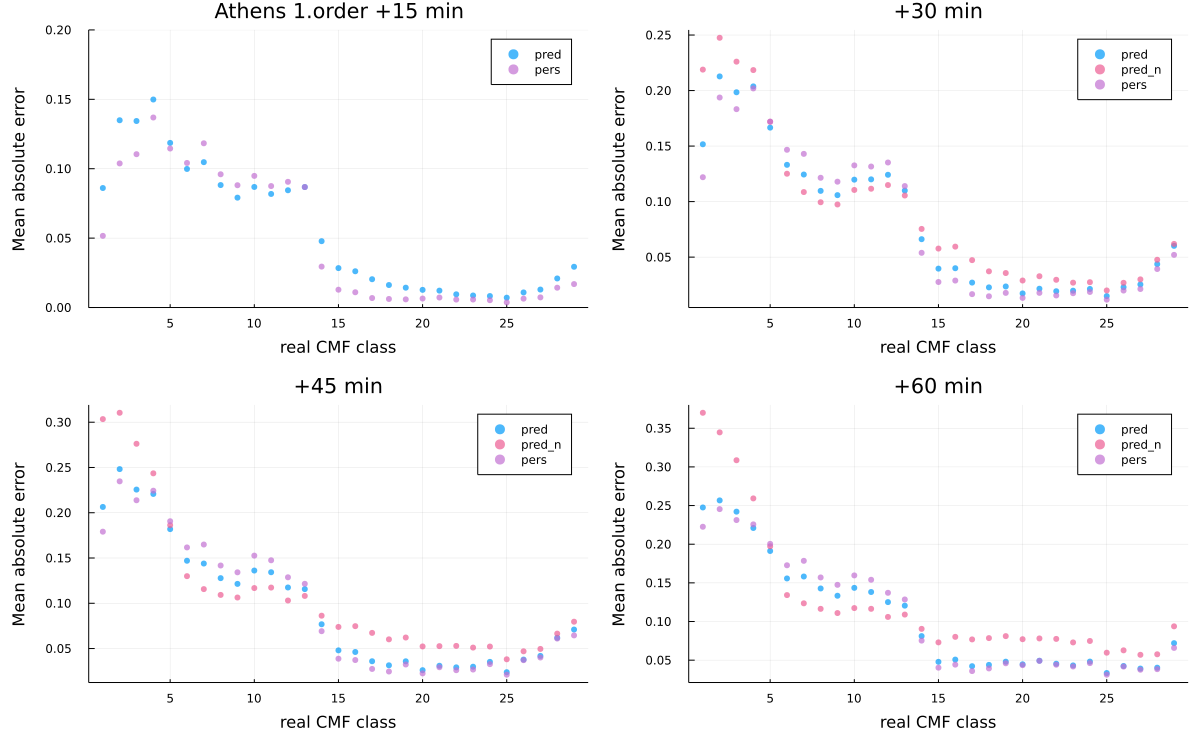

In [26]:
mae1 = plot(mae11, mae12, mae13, mae14, layout=@layout([a b; c d]), size=(1200, 750), #dpi=150, #ylim=(0, 0.35),
    left_margin=25px, bottom_margin=25px, fmt=:png)

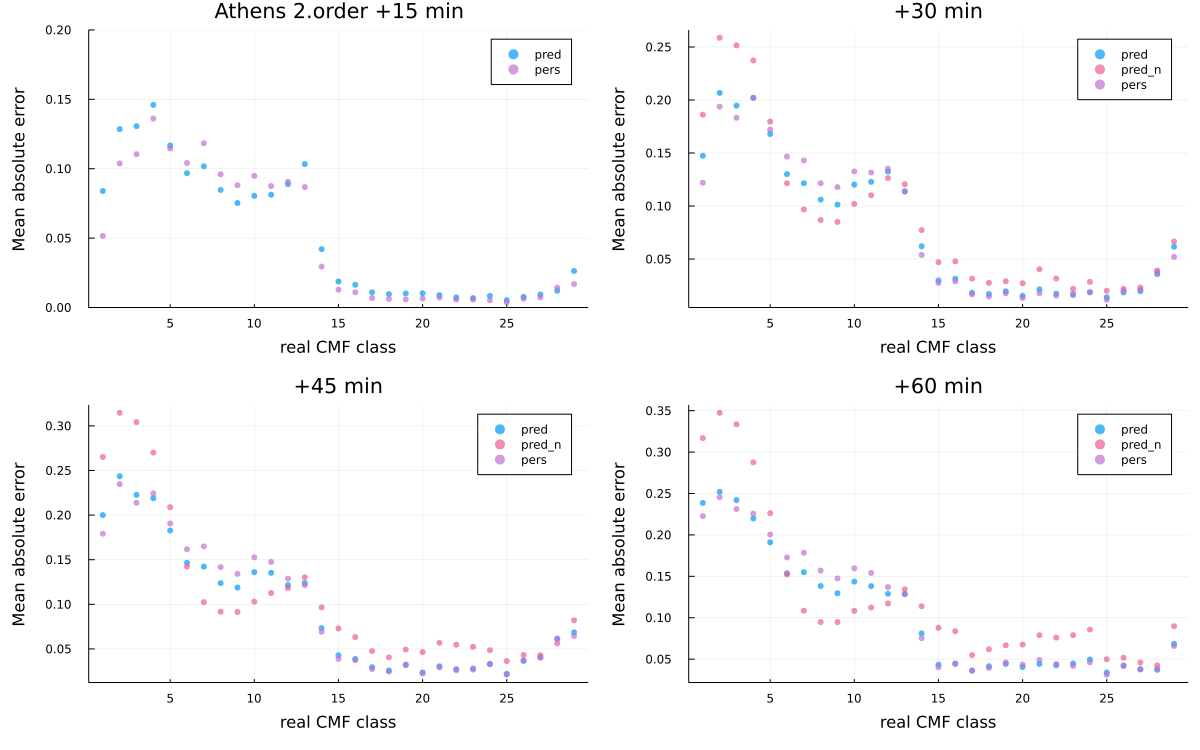

In [27]:
mae21 = mae_rmse(df21, tit="Athens 2.order +15 min")[1]

mae22 = viz_err(df22, "+30 min")
mae23 = viz_err(df23, "+45 min")
mae24 = viz_err(df24, "+60 min")

mae2 = plot(mae21, mae22, mae23, mae24, layout=@layout([a b; c d]), size=(1200, 750), # dpi=150, #ylim=(0, 0.35),
    left_margin=25px, bottom_margin=25px, fmt=:png)

In [30]:
ticks = string.(rd.(binMean, 2))

30-element Vector{String}:
 "0.19"
 "0.26"
 "0.32"
 "0.37"
 "0.43"
 "0.5"
 "0.59"
 "0.66"
 "0.71"
 "0.76"
 "0.81"
 "0.85"
 "0.9"
 ⋮
 "0.95"
 "0.95"
 "0.95"
 "0.95"
 "0.96"
 "0.96"
 "0.96"
 "0.96"
 "0.97"
 "0.97"
 "0.99"
 "1.0"

In [32]:
b11 = viz_box(df11, 1, "1.order t+$(15*1) min")

b12 = viz_box(df12, 2, "t+$(15*2) min")
b13 = viz_box(df13, 3, "t+$(15*3) min")
b14 = viz_box(df14, 4, "t+$(15*4) min")

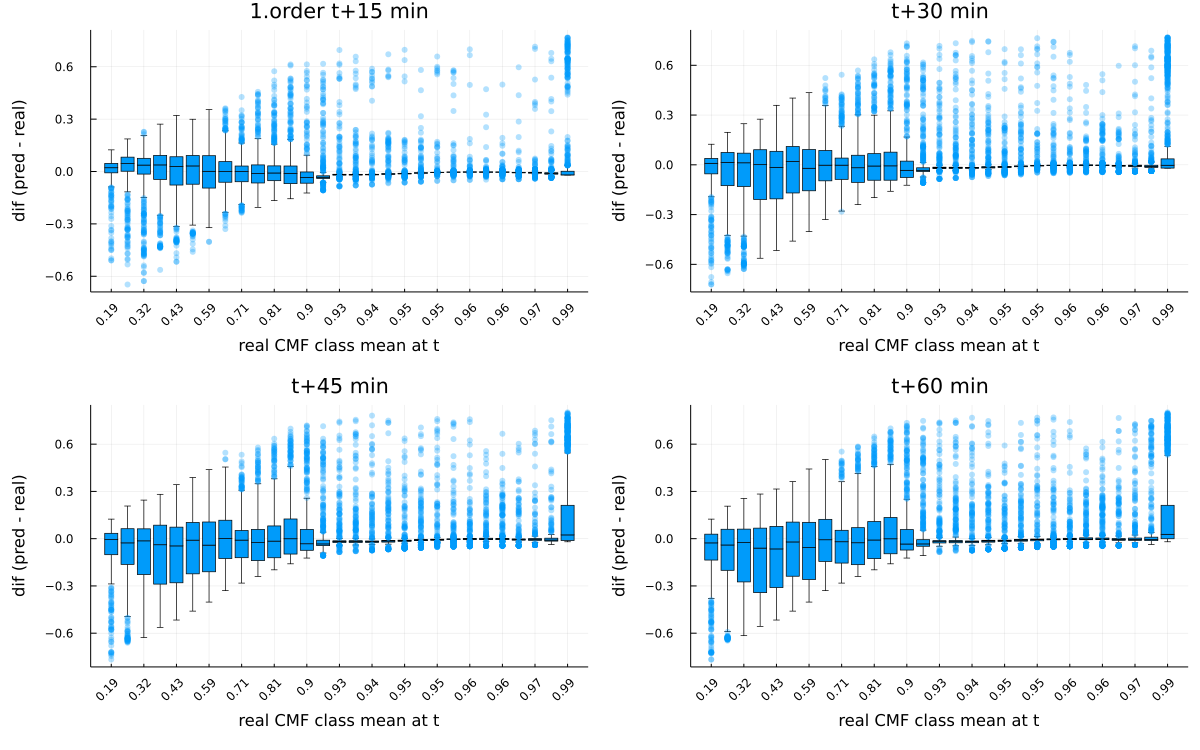

In [33]:
boxes1 = plot(b11, b12, b13, b14, layout=@layout([a b; c d]), size=(1200, 750), 
    left_margin=25px, bottom_margin=25px, fmt=:png)

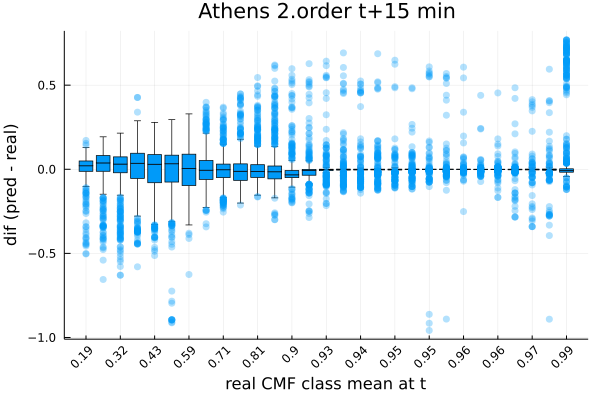

In [35]:
b21 = viz_box(df21, 1, "Athens 2.order t+$(15*1) min")

In [34]:
b22 = viz_box(df22, 2, "t+$(15*2) min")
b23 = viz_box(df23, 3, "t+$(15*3) min")
b24 = viz_box(df24, 4, "t+$(15*4) min");

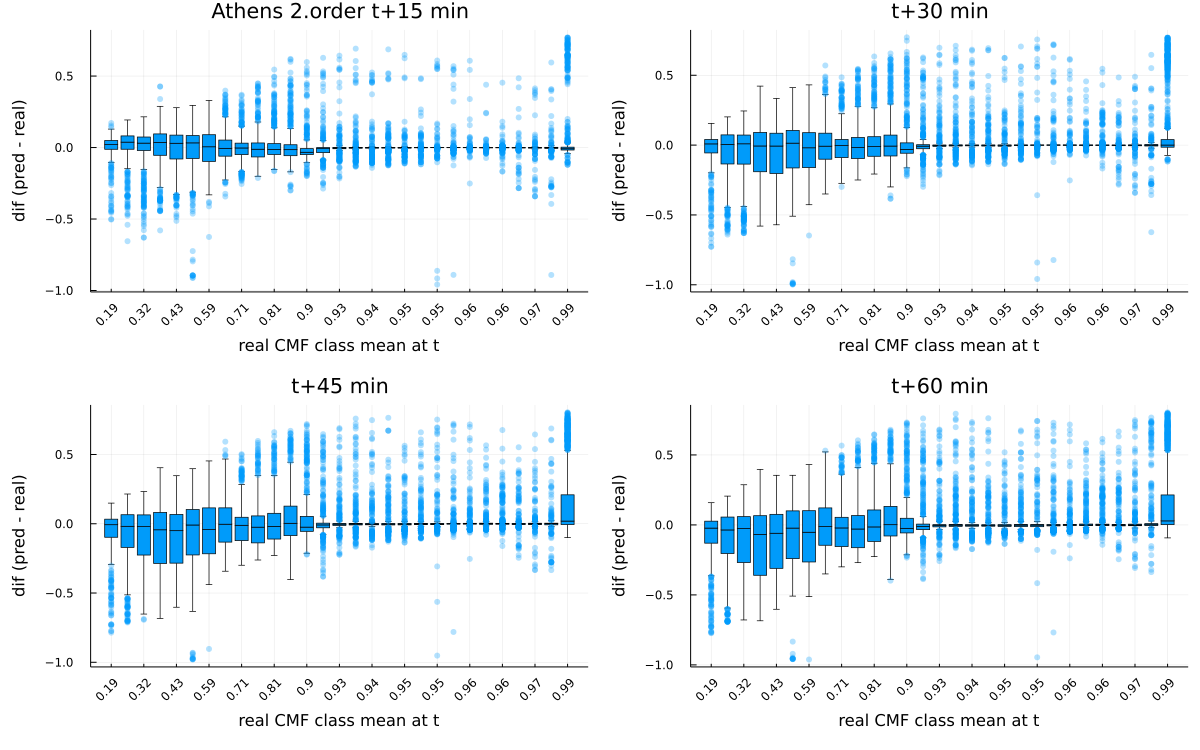

In [36]:
boxes2 = plot(b21, b22, b23, b24, layout=@layout([a b; c d]), size=(1200, 750), 
    left_margin=25px, bottom_margin=25px, fmt=:png)

### mn ± sd 

In [30]:
# apply time steps
aplTs(df, func) = combine(df, :dif_pers => func => :pers, :dif_neib => func => :neib, :dif_pred => func => :pred, 
    :dif_hyb_r => func => :hyb_r, :dif_hyb_m => func => :hyb_m);

In [31]:
col1 = combine(df2t, :dif_pred_n => mean => :pred_n)
append!(col1, combine(df3t, :dif_pred_n => mean => :pred_n))
append!(col1, combine(df4t, :dif_pred_n => mean => :pred_n))

col2 = reshape([NaN; Array(col1)], 4);

In [32]:
mns = aplTs(df1t, mean)
append!(mns, aplTs(df2t, mean))
append!(mns, aplTs(df3t, mean))
append!(mns, aplTs(df4t, mean));

In [33]:
insertcols!(mns, 4, :pred_n => col2)

,pers,neib,pred,pred_n,hyb_r,hyb_m
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.00256008,0.00826009,-0.00211363,NaN,0.00248971,-0.00199576
2,0.00438018,0.00991147,0.00606507,0.00169691,0.00525594,0.00543848
3,0.00453102,0.00996269,0.0097381,0.00212384,0.00788648,0.00877306
4,0.00443868,0.00967265,0.0102467,0.000379899,0.00493482,0.0084647


In [34]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std));

col3 = combine(df2t, :dif_pred_n => std => :pred_n)
append!(col3, combine(df3t, :dif_pred_n => std => :pred_n))
append!(col3, combine(df4t, :dif_pred_n => std => :pred_n))

col4 = reshape([NaN; Array(col3)], 4);

insertcols!(sds, 4, :pred_n => col4)

,pers,neib,pred,pred_n,hyb_r,hyb_m
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0974607,0.136177,0.0484958,NaN,0.0448996,0.0564401
2,0.137878,0.163108,0.086737,0.108437,0.0885272,0.0874554
3,0.15657,0.174249,0.118633,0.141822,0.117057,0.116248
4,0.169916,0.183484,0.137631,0.163974,0.135954,0.134331


In [43]:
gb1 = groupedbar(Matrix(mns), leg=:none, 
    c=[4 5 1 7 2 6], ylabel="Bias mean")

gb2 = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "pred_a" "pred_b" "hyb_r" "hyb_m"],
    c=[4 5 1 7 2 6],
    ylim=(0, 0.2), ylabel="Bias standard deviation");

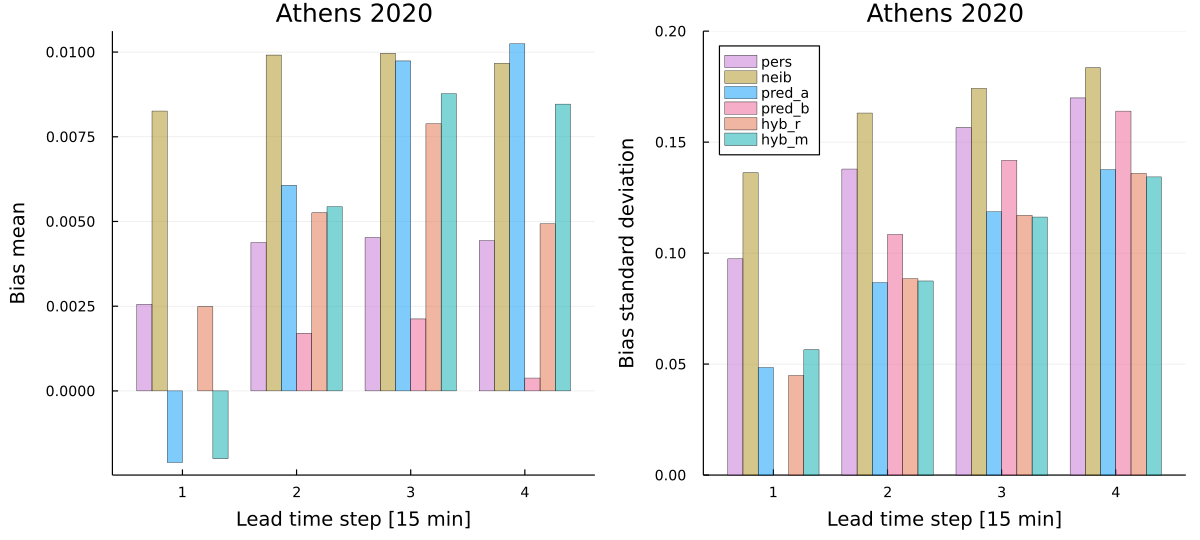

In [44]:
gbs = plot(gb1, gb2, layout=@layout([a b]), lw=0.3, fillalpha=0.5, grid=:y,
    xlabel="Lead time step [15 min]", title="Athens 2020",
    leftmargin=20px, bottommargin=20px, size=(1000, 450))

### rmse vs mae

df_err = 6×9 DataFrame
 Row │ method  mae1         mae2       mae3       mae4       rmse1        rmse2      rmse3     rmse4
     │ String  Float64      Float64    Float64    Float64    Float64      Float64    Float64   Float64
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ pers      0.0444944  0.0671722  0.0831133  0.094336     0.0974915  0.137943   0.156631  0.169969
   2 │ neib      0.0711223  0.0853934  0.0952542  0.103791     0.136423   0.163404   0.174528  0.183733
   3 │ pred_a    0.0278391  0.0467819  0.0631778  0.0771182    0.0485404  0.0869463  0.119028  0.138008
   4 │ pred_b  NaN          0.0645398  0.0870946  0.103892   NaN          0.108447   0.141834  0.163969
   5 │ hyb_m     0.0244403  0.0471371  0.0621365  0.0748111    0.0564738  0.0876218  0.116575  0.134593
   6 │ hyb_r     0.0256554  0.0477541  0.0630764  0.0775892    0.0449673  0.0886805  0.117319  0.13604


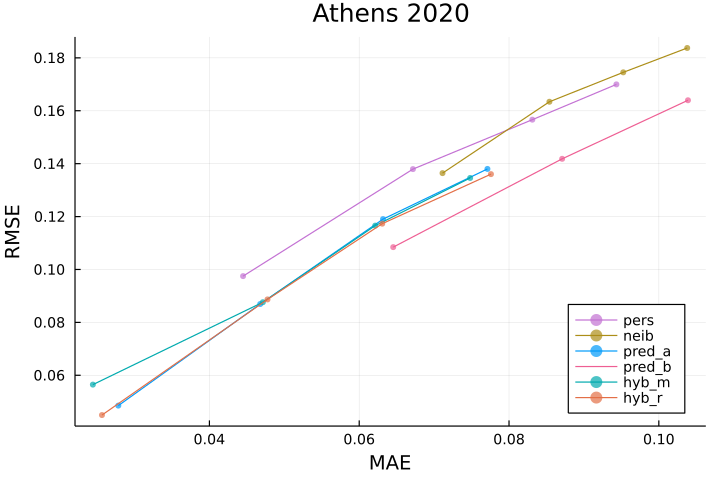

In [47]:
p = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=city*" 2020")

### First order difference

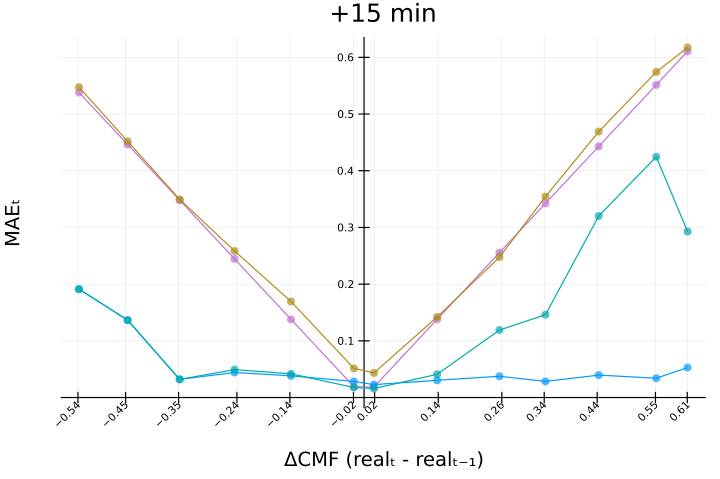

In [50]:
dif1 = viz_dif(df1t, 1)

In [51]:
dif2 = viz_dif(df2t, 2)

dif3 = viz_dif(df3t, 3)

dif4 = viz_dif(df4t, 4);

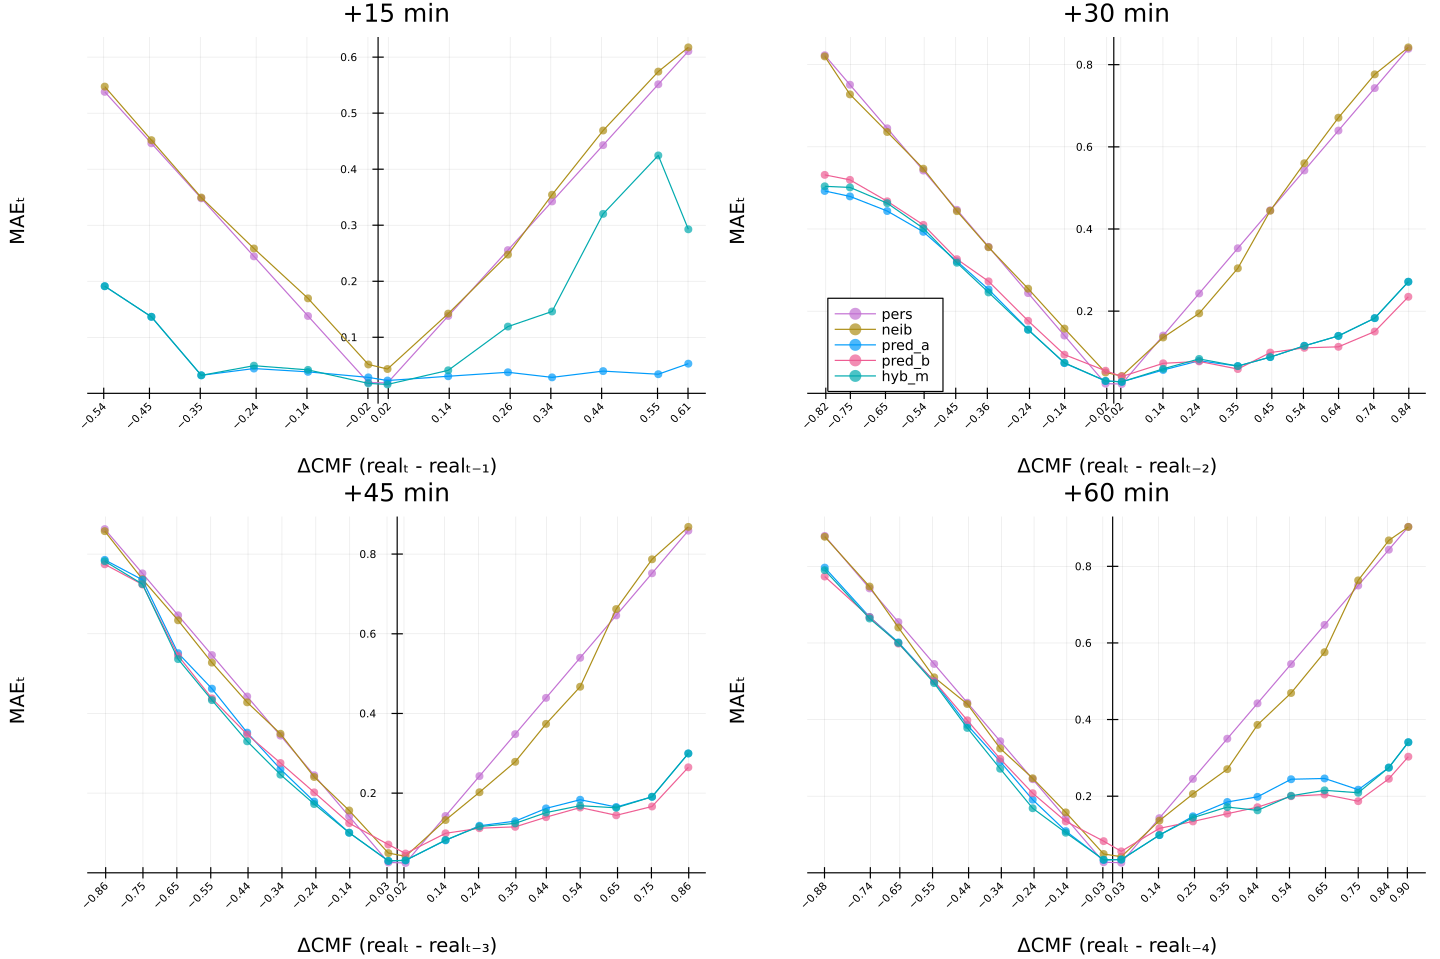

In [52]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    leftmargin=20px, ylabel="MAEₜ")

### GHI evaluation

In [53]:
df1g = getGHI(df1t, 1)

,month,ghi,ghi_pers,ghi_neib,ghi_pred,ghi_hyb_m,ghi_hyb_r
,Int8,Float64,Float64,Float64,Float64,Float64,Float64
1,1,6.20729,5.07468,5.30254,6.17768,5.07468,5.07468
2,1,13.3307,12.1263,15.6236,13.3429,13.3429,13.3429
3,1,16.9255,20.2904,22.4874,17.7383,17.7383,17.7383
4,1,23.4972,22.7931,27.0093,24.2558,24.2558,24.2558
5,1,28.8591,29.4388,30.9699,30.3892,30.3892,30.3892
6,1,36.6478,34.484,36.0696,36.3122,36.3122,36.3122
7,1,46.2966,42.342,43.603,47.3055,47.3055,47.3055
8,1,54.5623,52.1428,52.5395,57.5012,57.5012,57.5012
9,1,49.9429,60.2314,50.1777,51.1258,51.1258,51.1258


In [54]:
df2g = getGHI(df2t, 2)

df3g = getGHI(df3t, 3)
df4g = getGHI(df4t, 4);

#### MAE

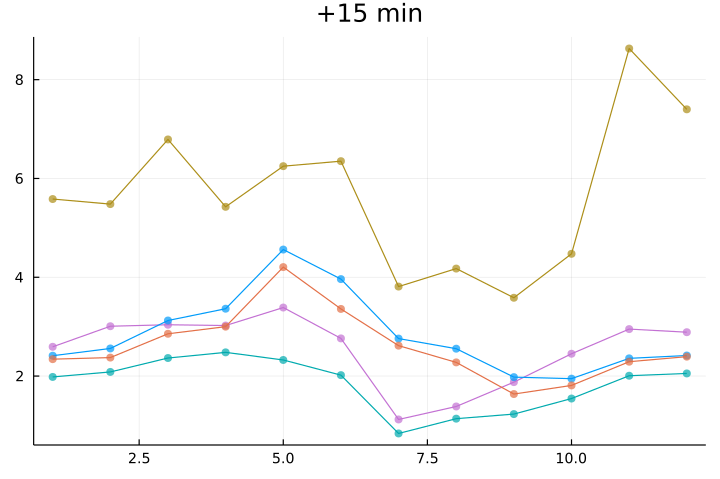

In [55]:
pg1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min")

In [56]:
pg2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min")

pg3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min")
pg4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min");

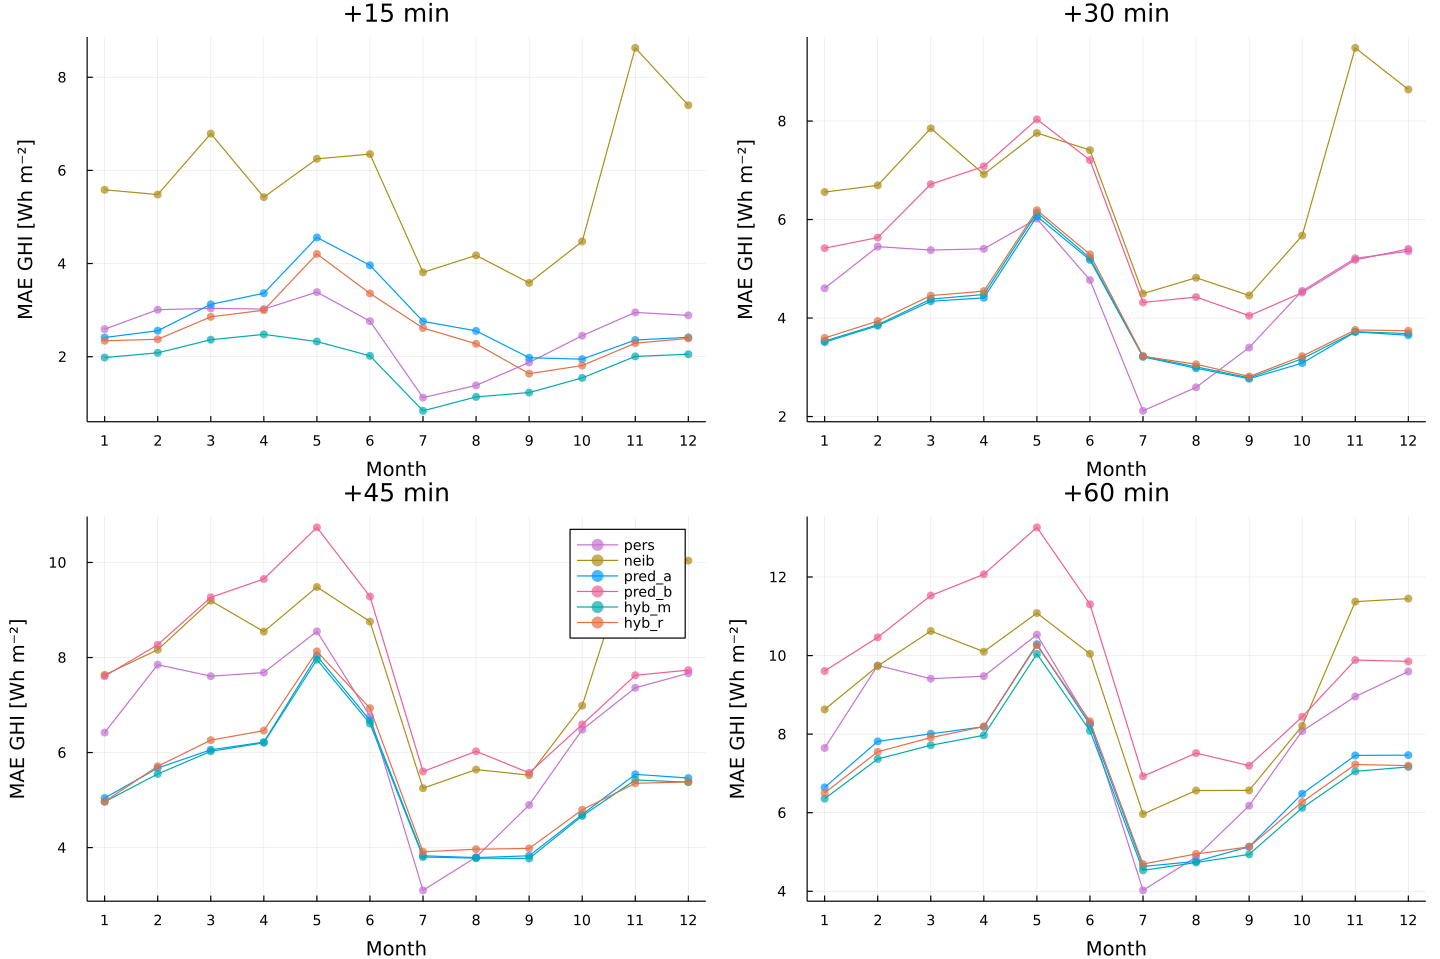

In [57]:
ps_ghi_mae = plot(pg1, pg2, pg3, pg4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="MAE GHI [Wh m⁻²]")

#### RMSE

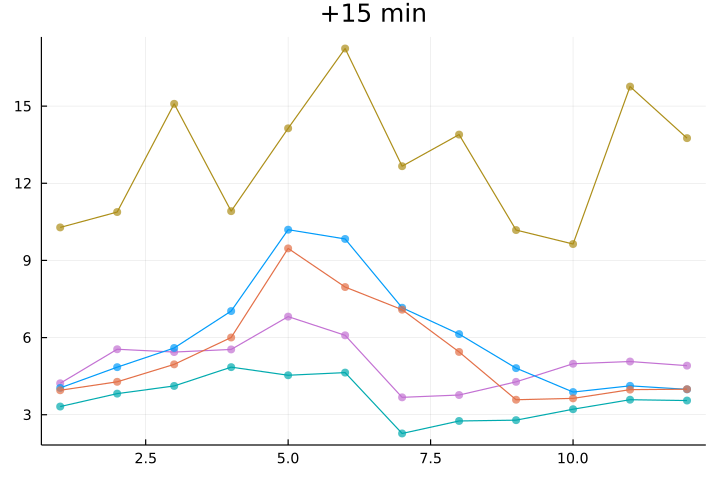

In [58]:
pgr1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min", err="rmse")

In [60]:
pgr2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min", err="rmse")

pgr3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min", err="rmse")

pgr4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min", err="rmse");

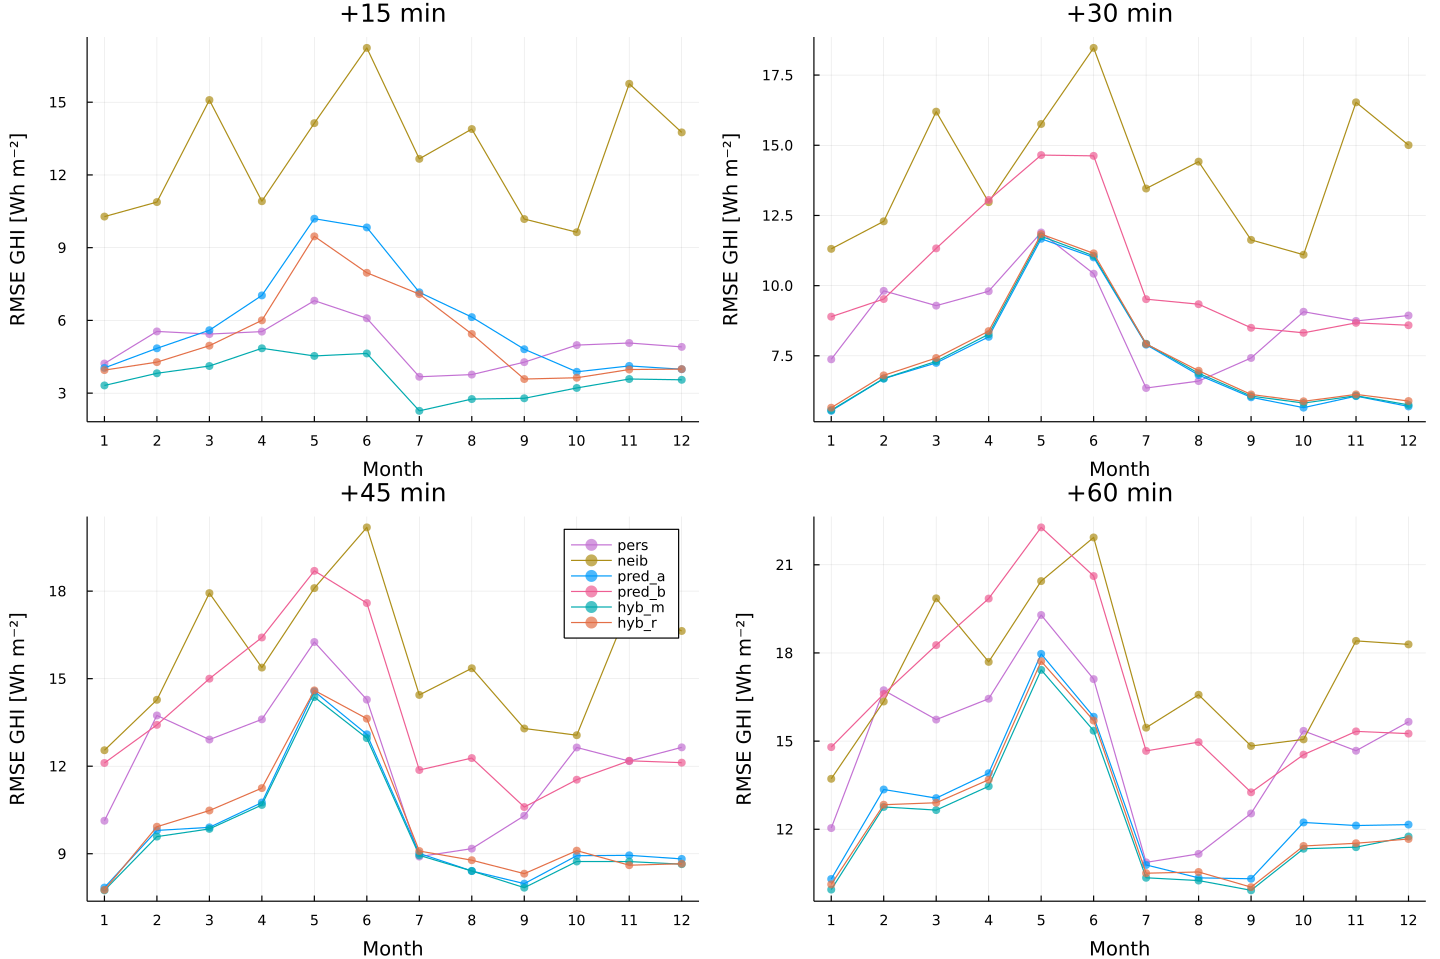

In [61]:
ps_ghi_rmse = plot(pgr1, pgr2, pgr3, pgr4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="RMSE GHI [Wh m⁻²]")